In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 16s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
image_cnt = len(list(data_dir.glob('*/*.jpg')))
image_cnt

3670

**This will give us a path (Linux path) for all the files which as a .jpg file extension. (i.e images)**

In [11]:
roses = list(data_dir.glob('roses/*.jpg'))
roses

[PosixPath('datasets/flower_photos/roses/6347847065_83cf87333b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7551637034_55ae047756_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2423565102_2f1a00bb1b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/488849503_63a290a8c2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15333843782_060cef3030.jpg'),
 PosixPath('datasets/flower_photos/roses/5223191368_01aedb6547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7820626638_3e2d712303.jpg'),
 PosixPath('datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12395698413_c0388278f7.jpg'),
 PosixPath('datasets/flower_photos/roses/2392457180_f02dab5c65.jpg'),
 PosixPath('datasets/flower_photos/roses/15236835789_6009b8f33d.jpg'),
 PosixPath('datasets/flower_photos/roses/3903276582_fe05bf84c7_n.jpg'),
 

In [12]:
len(roses)

641

In [13]:
dandelion = list(data_dir.glob('dandelion/*.jpg'))
dandelion

[PosixPath('datasets/flower_photos/dandelion/18587334446_ef1021909b_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/10778387133_9141024b10.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8632704230_ccafc5f7e2.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3539077354_c67aa7168d_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/160456948_38c3817c6a_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4716316039_044e4d2d1a.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5762590366_5cf7a32b87_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7262863194_682209e9fb.jpg'),
 PosixPath('datasets/flower_photos/dandelion/6897671808_57230e04c5_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8681169825_19a21c6bf5_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8915661673_9a1cdc3755_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4684022752_89631bd98e_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7062171343_db61c92737_n.jpg'),
 PosixPath('dataset

In [14]:
from PIL import Image

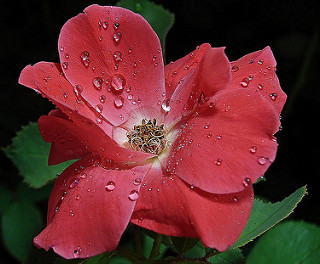

In [15]:
Image.open(roses[0])

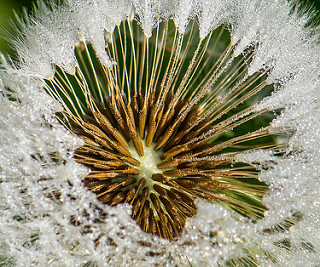

In [18]:
Image.open(dandelion[0])

In [68]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten

In [138]:
data_augmentation = [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(100,100,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
]

In [139]:
model = tf.keras.Sequential([
    *data_augmentation,
    Conv2D(filters=96, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(100,100, 3)),
    Flatten(),
    Dense(units=256, activation='relu', input_shape=(10,)),
    Dense(units=8, activation='relu'),
    Dense(units=6, activation='softmax')
    
])

dense_layer = model.layers[0]

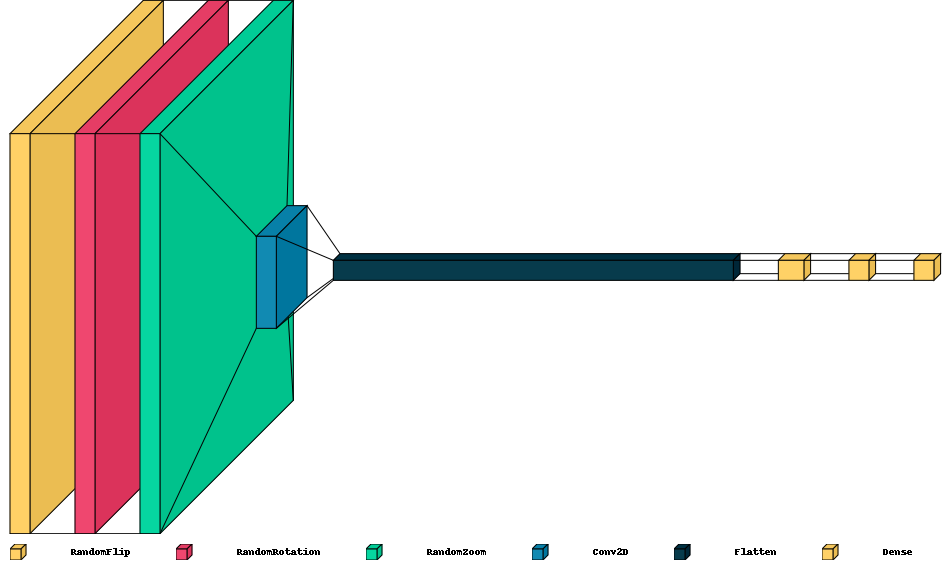

In [140]:
import visualkeras
visualkeras.layered_view(model,legend=True,draw_volume=True,spacing=45)

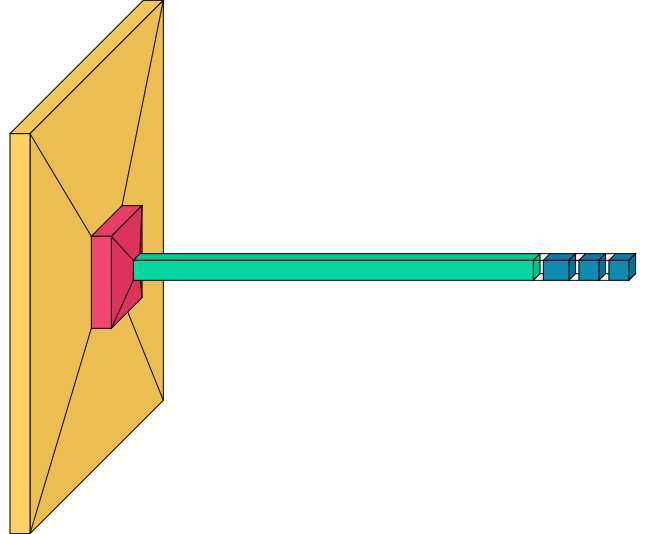

In [127]:
import visualkeras
visualkeras.layered_view(model)